In [3]:
import pandas as pd

df = pd.read_csv('price_paid_records.csv', nrows=100000)
df.to_csv('sampled_housing_data.csv', index=False)



In [4]:
print(df.isnull().sum())

df['price'] = df['price'].fillna(df['price'].mean())

df['property_type'] = df['property_type'].fillna(df['property_type'].mode()[0])


Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64


In [8]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

categorical_columns = ['Property Type', 'Old/New', 'Duration', 'PPDCategory Type', 'Record Status - monthly file only']
for col in categorical_columns:
    df[col] = df[col].astype('category')

print(df.dtypes)


Transaction unique identifier          object
Price                                   int64
Date of Transfer                       object
Property Type                        category
Old/New                              category
Duration                             category
Town/City                              object
District                               object
County                                 object
PPDCategory Type                     category
Record Status - monthly file only    category
dtype: object


In [17]:
top_cities = df['Town/City'].value_counts().nlargest(10).index

df_top_cities = df[df['Town/City'].isin(top_cities)]


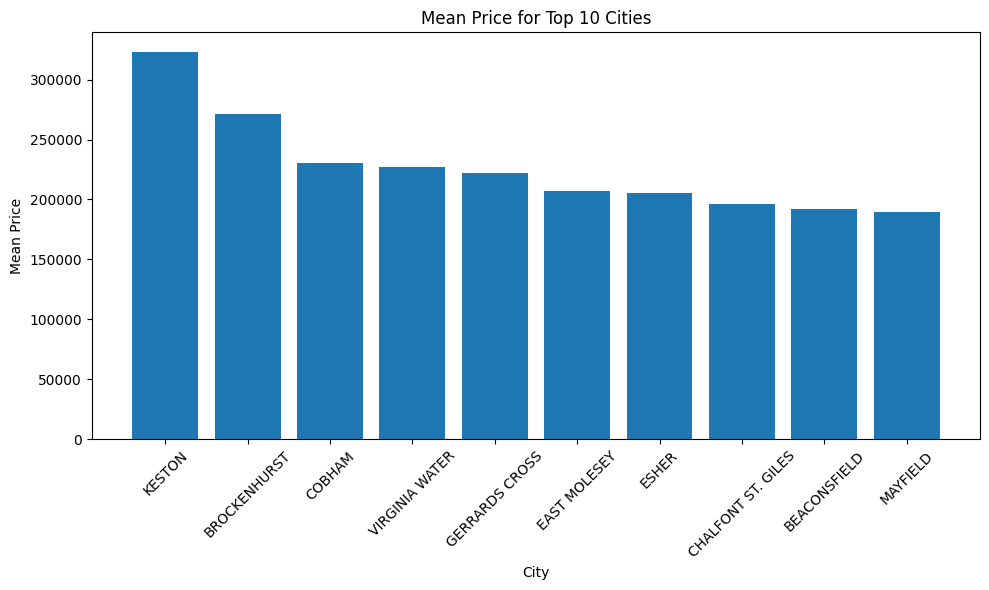

In [18]:
mean_price_per_city = df.groupby('Town/City')['Price'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
plt.bar(mean_price_per_city['Town/City'], mean_price_per_city['Price'])

plt.title('Mean Price for Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
